In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import mahotas as mh

from skimage import io
from skimage.io import imshow, imread
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

file = 'materials/spindle.tif'
image = io.imread(file)

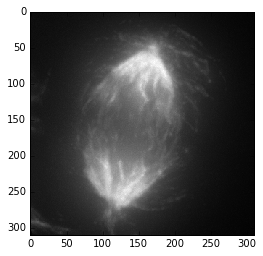

In [2]:
io.imshow(image)

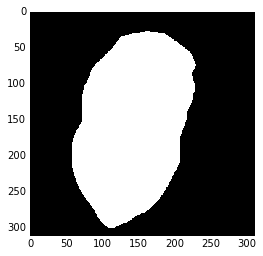

In [4]:
imagef = mh.gaussian_filter(image, 6)
imagef = (imagef > imagef.mean())
imshow(imagef)

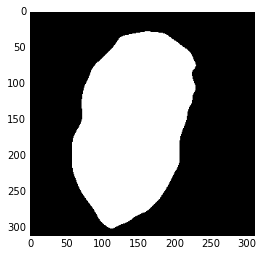

In [5]:
label_img = label(imagef)
regions = regionprops(label_img)

plt.imshow(label_img, cmap = 'gray') 

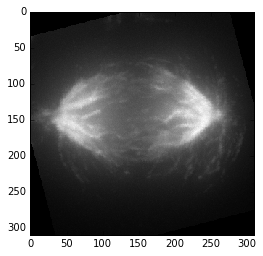

In [6]:
label_img = label(imagef)
regions = regionprops(label_img)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation

image_rotated = rotate(image, angle = - orientation * 180 / np.pi, order = 0)
imshow(image_rotated)

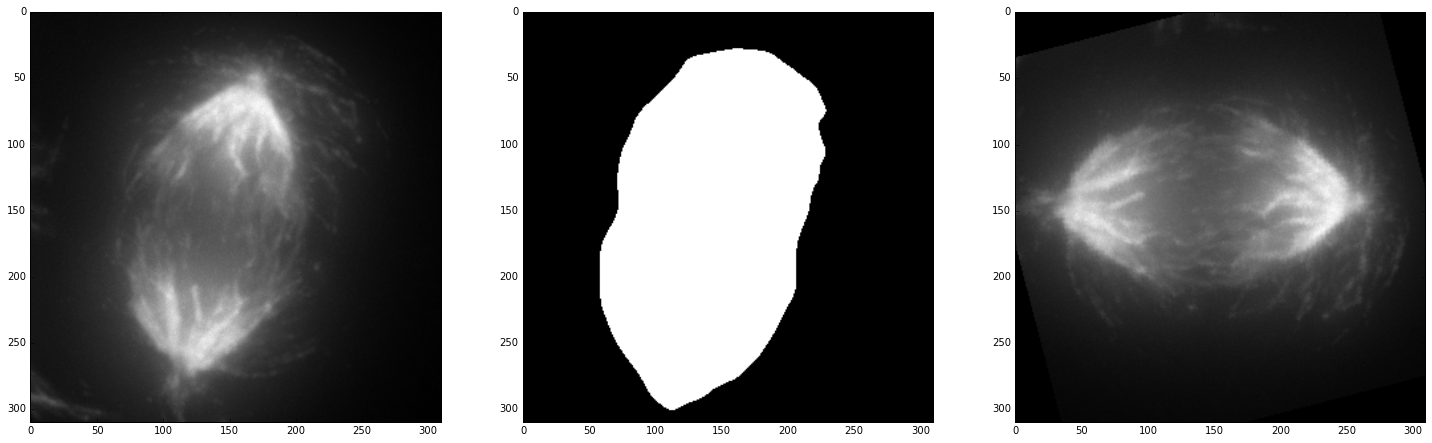

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (25, 25))
ax1.imshow(image, cmap= 'gray')
ax2.imshow(imagef, cmap = 'gray')
ax3.imshow(image_rotated, cmap = 'gray')


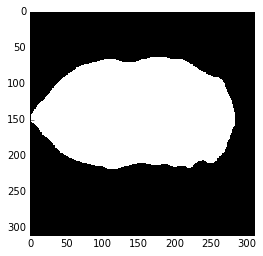

In [8]:
imagef_rotated = mh.gaussian_filter(image_rotated, 5)
imagef_rotated = (imagef_rotated > imagef_rotated.mean())
imshow(imagef_rotated)

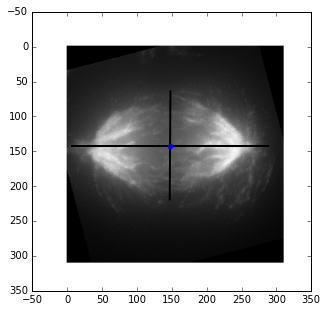

In [9]:
label_img = label(imagef_rotated)
regions = regionprops(label_img)

for props in regions:
    y0, x0 = props.centroid
    y0 = int(y0)
    x0 = int(x0)
    orientation = props.orientation
    
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.imshow(image_rotated, cmap=plt.cm.gray)
    
    xr = int(x0 + math.cos(orientation) * 0.5 * props.major_axis_length)
    yr = int(y0 - math.sin(orientation) * 0.5 * props.major_axis_length)
    xl = int(x0 - math.cos(orientation) * 0.5 * props.major_axis_length)
    yl = int(y0 - math.sin(orientation) * 0.5 * props.major_axis_length)
    
    xt = int(x0 - math.sin(orientation) * 0.5 * props.minor_axis_length)
    yt = int(y0 - math.cos(orientation) * 0.5 * props.minor_axis_length)
    xb = int(x0 + math.sin(orientation) * 0.5 * props.minor_axis_length)
    yb = int(y0 + math.cos(orientation) * 0.5 * props.minor_axis_length)
    
    ax.plot((xl, xr), (yl, yr), '-k', linewidth=2)
    ax.plot((xt, xb), (yt, yb), '-k', linewidth=2)
    ax.plot(x0, y0, '.b', markersize=10)
    

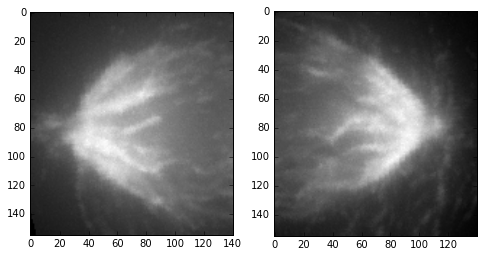

In [10]:
left_spindle = image_rotated[yt:yb, xl:int(x0)]
right_spindle = image_rotated[yt:yb, int(x0):xr]

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8, 8))
ax1.imshow(left_spindle, cmap = 'gray')
ax2.imshow(right_spindle, cmap = 'gray')

[  379.35686275   493.63137255   757.55294118   999.37647059  1096.91372549
  1055.74509804   947.27843137   797.50588235   712.49019608   661.03137255]


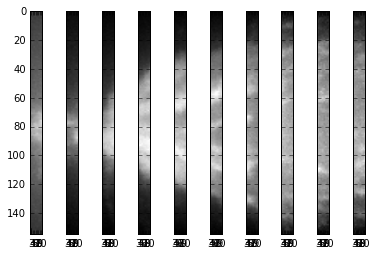

In [17]:
steps = 10

binl_size = int((x0 - xl) / steps)
fig, axes = plt.subplots(ncols = steps, sharey = True)
binl = np.zeros(steps)
for i in np.arange(steps):
    axes[i].imshow(image_rotated[yt:yb, (xl + i * binl_size) : (xl + (i + 1) * binl_size)], 
                   cmap = 'gray')
    binl[i] = np.sum(image_rotated[yt:yb, (xl + i * binl_size) : (xl + (i + 1) * binl_size)])
print(binl)
plt.subplots_adjust(wspace=2)

[  677.05098039   782.05882353   903.25098039   958.35686275  1085.71764706
  1164.56078431  1013.67058824   753.73333333   549.92156863   343.20784314]


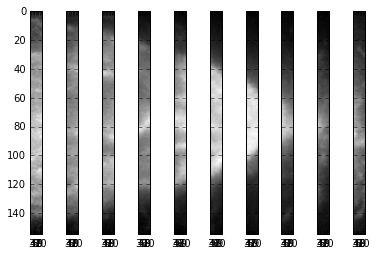

In [18]:
binl_size = int((xr - x0) / steps)
fig, axes = plt.subplots(ncols = steps, sharey = True)
binr = np.zeros(steps)
for i in np.arange(steps):
    axes[i].imshow(image_rotated[yt:yb, (x0 + i * binl_size) : (x0 + (i + 1) * binl_size)], 
                   cmap = 'gray')
    binr[i] = np.sum(image_rotated[yt:yb, (x0 + i * binl_size) : (x0 + (i + 1) * binl_size)])
print(binr)
plt.subplots_adjust(wspace=2)

In [19]:
bin = np.concatenate([binl, binr])
print(bin)

[  379.35686275   493.63137255   757.55294118   999.37647059  1096.91372549
  1055.74509804   947.27843137   797.50588235   712.49019608   661.03137255
   677.05098039   782.05882353   903.25098039   958.35686275  1085.71764706
  1164.56078431  1013.67058824   753.73333333   549.92156863   343.20784314]


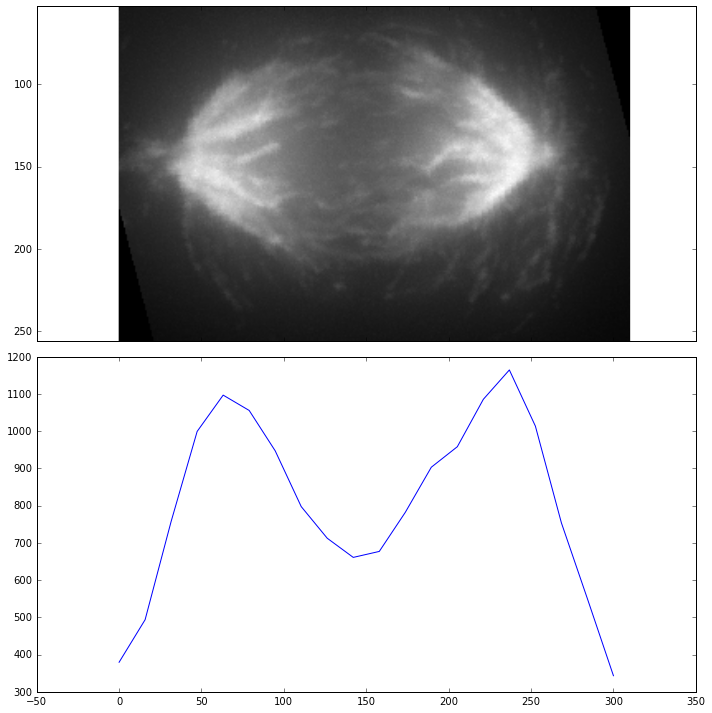

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = (10, 10))
ax1.imshow(image_rotated, cmap = 'gray')
ax2.plot(np.linspace(0, 300, 20), bin)


plt.tight_layout()

In [14]:
np.savetxt('rotateSpindleAxis.csv', bin, delimiter = ',')